In [739]:
# coding=utf8

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [740]:
# 1. 获取数据
# 2. 基本数据处理
# 2.1 缺失值处理
# 2.2 确定特征值，目标值
# 2.3 分割数据
# 3. 特征工程（标准化）
# 4. 机器学习（逻辑回归）
# 5. 模型评估

In [741]:
# 1. 获取数据
df = pd.read_csv('data/交易明细.csv',
                 sep=',',
                 # index_col=['时间'],  # 设置行索引
                 parse_dates=['时间'],  # 解析时间 2017/8/16 18:10
                 date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d %H:%M'),  # 时间解析的格式
                 usecols=['时间', '方向', '开仓均价', '平仓价格', '类别'],
                 encoding='gbk',
                 )
pd.set_option('precision', 2)  # 显示小数点后的位数
np.set_printoptions(precision=3, suppress=True)  #设定numpy显示浮点数精度的小数位数,不使用科学记数法

print(df.dtypes)
df.head()

时间      datetime64[ns]
方向               int64
开仓均价             int64
平仓价格             int64
类别               int64
dtype: object


,时间,方向,开仓均价,平仓价格,类别
0,2017-08-16 18:10:00,-1,1723,1726,0
1,2017-08-18 13:30:00,1,1726,1732,1
2,2017-08-18 13:50:00,-1,1732,1735,0
3,2017-08-18 14:00:00,1,1735,1732,0
4,2017-08-21 13:25:00,-1,1732,1734,0


In [742]:
# 2. 基本数据处理
# 2.1 缺失值处理
# 2.2 确定特征值，目标值

In [743]:
# x = df.iloc[:, 1: -1]
x = df.loc[:, ['开仓均价', '平仓价格']]
x.head()

,开仓均价,平仓价格
0,1723,1726
1,1726,1732
2,1732,1735
3,1735,1732
4,1732,1734


In [744]:
y = df["方向"]  #-1代表收盘<开盘价, 1代表收盘价>开盘价
print(y.head())

yy = df.replace({'类别': {0: -1}})  #把0更换成-1方便分析, -1代表空头交易, 1代表多头交易
print(yy.head(20))

yy = df['方向'] * yy['类别']  #-1代表亏损的交易, 1代码赢利的交易
print(yy.head(20))


0   -1
1    1
2   -1
3    1
4   -1
Name: 方向, dtype: int64
                    时间  方向  开仓均价  平仓价格  类别
0  2017-08-16 18:10:00  -1  1723  1726  -1
1  2017-08-18 13:30:00   1  1726  1732   1
2  2017-08-18 13:50:00  -1  1732  1735  -1
3  2017-08-18 14:00:00   1  1735  1732  -1
4  2017-08-21 13:25:00  -1  1732  1734  -1
5  2017-08-21 17:50:00   1  1734  1728  -1
6  2017-08-22 17:35:00  -1  1728  1730  -1
7  2017-08-23 18:30:00   1  1730  1731   1
8  2017-08-29 13:15:00  -1  1731  1722   1
9  2017-08-29 14:00:00   1  1722  1718  -1
10 2017-09-01 13:25:00  -1  1718  1690   1
11 2017-09-01 13:40:00   1  1690  1692   1
12 2017-09-01 14:15:00  -1  1692  1694  -1
13 2017-09-01 15:05:00   1  1694  1691  -1
14 2017-09-01 18:20:00  -1  1691  1694  -1
15 2017-09-01 18:55:00   1  1694  1691  -1
16 2017-09-04 13:10:00  -1  1691  1698  -1
17 2017-09-05 14:55:00   1  1698  1709   1
18 2017-09-05 17:45:00  -1  1709  1713  -1
19 2017-09-06 19:00:00   1  1713  1715   1
0     1
1     1
2     1
3    -1
4     1

In [745]:
# 2.3 分割数据
x_train, x_test, y_train, y_test, yy_train, yy_test = train_test_split(x, y.ravel(), yy.ravel(), random_state=2,
                                                                       test_size=0.2)

In [746]:
# 3. 特征工程（标准化）
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [747]:
print(type(y), type(yy))
print(type(x_train), type(x_test))
print(type(y_train), type(y_test))
print(type(yy_train), type(yy_test))
print(yy_train.shape, yy_test.shape)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(400,) (100,)


In [748]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


In [749]:
# 4. 机器学习（逻辑回归）
# estimator = LogisticRegression()
estimator = KNeighborsClassifier(5)
estimator.fit(x_train, yy_train)

KNeighborsClassifier()

In [764]:
# 5. 模型评估
y_pre = estimator.predict(x_test)
print("预测值：\n", y_pre)
print(type(y_pre))
score = estimator.score(x_test, yy_test)
print('分类器: %s' % estimator)
print("测试集R2评分: %.2f" % score)

预测值：
 [-1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1  1
  1 -1  1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1
  1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1
  1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1
 -1 -1 -1 -1]
<class 'numpy.ndarray'>
分类器: KNeighborsClassifier()
测试集R2评分: 0.83


In [751]:
left = df[['方向', '类别']].iloc[-10:]
right = pd.DataFrame(y_pre[-10:])
df[['方向', '类别']].iloc[-10:]

,方向,类别
490,-1,0
491,1,0
492,-1,0
493,1,0
494,-1,0
495,1,1
496,-1,0
497,1,0
498,-1,0
499,1,0


In [752]:
print(y_pre[-10:])
print(y_test[-10:])
print(yy_test[-10:])
# print(yy_test[yy_test == 1])

[ 1 -1 -1 -1  1  1 -1 -1 -1 -1]
[-1  1  1  1 -1  1  1 -1  1 -1]
[ 1 -1 -1 -1  1  1 -1 -1 -1  1]


In [753]:
# 拟合分类模型
rbf = SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)
linear = SVC(kernel='linear', C=1.0, gamma='auto', probability=True)
poly = SVC(kernel='poly', C=1.0, gamma='auto', degree=3, coef0=1, probability=True)

In [754]:
svcs = [rbf, linear, poly]
kernel_label = ["rbf", "linear", "poly"]
for ix, svc in enumerate(svcs):
    performance = svc.fit(x_train, yy_train.ravel())
    # 获取预测值
    y_test_pred = performance.predict(x_test)
    # 显示估计器
    print(f'ix=%s, svcs=%s' % (ix, svcs[ix]))
    # 获取这个估计器的参数
    print(f'估计器的参数: %s' % (svc.get_params()))
    # https://blog.csdn.net/gracejpw/article/details/101546293
    # 返回预测的决定系数R^2
    # R^2越接近于1，模型的拟合优度越高。
    print(f'训练集R2评分: %.2f ' % (performance.score(x_train, yy_train)))
    print(f'测试集R2评分: %.2f ' % (svc.score(x_test, yy_test)))

ix=0, svcs=SVC(gamma='auto', probability=True)
估计器的参数: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
训练集R2评分: 0.58 
测试集R2评分: 0.59 
ix=1, svcs=SVC(gamma='auto', kernel='linear', probability=True)
估计器的参数: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
训练集R2评分: 0.67 
测试集R2评分: 0.64 
ix=2, svcs=SVC(coef0=1, gamma='auto', kernel='poly', probability=True)
估计器的参数: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly', 'max_ite

目标类别统计 (array([-1,  1], dtype=int64), array([46, 54], dtype=int64))
预测类别统计 (array([-1,  1], dtype=int64), array([34, 66], dtype=int64))
预测相同 [55 14  9  4  4  4  4  9 14 55] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
预测不同 [1 2 3 3 5 5 3 3 2 1] [0.118 0.195 0.271 0.347 0.424 0.5   0.576 0.653 0.729 0.805 0.882]
[0.  0.1 0.2 0.3 0.4 0.6 0.7 0.8 0.9 1. ]
[0.118 0.195 0.271 0.347 0.424 0.576 0.653 0.729 0.805 0.882]


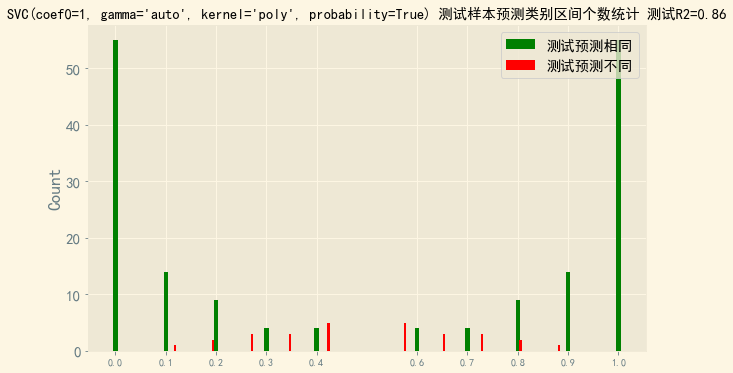

In [762]:
# 绘制训练样本类别预测与目标分类的相同和不同的概率区别统计图
plt.style.use(plt.style.available[0])  #可以通过下标进行选择适合自己的画图样式
plt.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体,用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

clf = svcs[2]
# clf = estimator
score_test = clf.score(x_test, yy_test)
# print(clf.kernel)
print('目标类别统计', np.unique(yy_test, axis=0, return_counts=True))  #统计等每个分类的个数

x_test_pred = clf.predict(x_test)[:]  #测试样本预测
print('预测类别统计', np.unique(x_test_pred, axis=0, return_counts=True))  #统计预测的每个分类个数

id_test_no = (x_test_pred != yy_test)  #测试样本预测类别与测试目标类别不同的下标
id_test_ok = (x_test_pred == yy_test)  #测试样本预测类别与测试目标类别不同的下标
test_no = clf.predict_proba(x_test)[id_test_no][:]  #测试样本预测类别与测试目标类别不同的概率值,返回的是每个类别的概率,每行所有类别概率合计为1
test_ok = clf.predict_proba(x_test)[id_test_ok][:]  #返回1类个别的概率

# 绘制测试样本类别预测与目标分类的相同和不同的概率区别统计图
his_test_count_ok, his_interval_ok = np.histogram(test_ok, bins=10)
print('预测相同', his_test_count_ok, his_interval_ok)
his_test_count_no, his_interval_no = np.histogram(test_no, bins=10)
print('预测不同', his_test_count_no, his_interval_no)
# 绘制图像
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)
plt.set_cmap('RdBu')
# plt.set_cmap('jet')

his_interval_ok = np.delete(his_interval_ok, [5])
his_interval_no = np.delete(his_interval_no, [5])
print(his_interval_ok)
print(his_interval_no)
w = his_interval_no[-1] / 100
# 绘制多个bar在同一个图中, 这里需要控制width
plt.bar(his_interval_ok, height=his_test_count_ok, width=1 * w, align='center', color=['g'])  #测试样本预测相同
plt.bar(his_interval_no, height=his_test_count_no, width=0.5 * w, align='center', color=['r'])  #测试样本预测不同

# 设置坐标轴的标签
ax1.yaxis.set_tick_params(labelsize=15)  # 设置y轴的字体的大小
ax1.set_xticks(his_interval_ok)  # 设置xticks出现的位置
# 设置坐标轴名称
ax1.set_ylabel("Count", fontsize='xx-large')
# 设置标题
ax1.set_title('%s 测试样本预测类别区间个数统计 测试R2=%.2f' % (clf, score_test), fontsize='x-large')
# 设置图例
plt.legend(('测试预测相同', '测试预测不同'), fontsize='x-large', loc='upper right')
plt.show()

(86, 2) (14, 2)


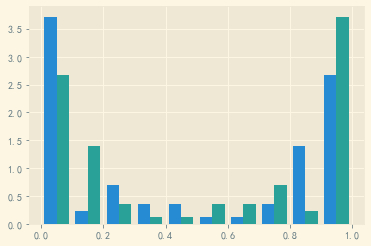

In [766]:
print(test_ok.shape, test_no.shape)
plt.hist(test_ok[:], bins=10, density=True)
plt.show()


In [757]:
print(x_test_pred[:20])
print(yy_test[:20])
print(type(x_test_pred), x_test_pred.shape)
print(type(yy_test), yy_test.shape)

[ 1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1]
[-1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1]
<class 'numpy.ndarray'> (100,)
<class 'numpy.ndarray'> (100,)


In [767]:
print('测试样本预测类别与测试目标类别相同的有%s 由predict_proba计算的概率值,显示前10行\n%s'
      % (test_ok.shape, clf.predict_proba(x_test)[id_test_ok][:10]))

print('测试样本预测类别与测试目标类别不同有%s 由predict_proba计算的概率值,显示前10行\n%s'
      % (test_no.shape, clf.predict_proba(x_test)[id_test_no][:10]))

测试样本预测类别与测试目标类别相同的有(86, 2) 由predict_proba计算的概率值,显示前10行
[[0.95  0.05 ]
 [0.085 0.915]
 [0.761 0.239]
 [0.051 0.949]
 [0.    1.   ]
 [0.733 0.267]
 [0.    1.   ]
 [0.999 0.001]
 [0.412 0.588]
 [0.065 0.935]]
测试样本预测类别与测试目标类别不同有(14, 2) 由predict_proba计算的概率值,显示前10行
[[0.685 0.315]
 [0.532 0.468]
 [0.631 0.369]
 [0.569 0.431]
 [0.731 0.269]
 [0.882 0.118]
 [0.624 0.376]
 [0.412 0.588]
 [0.553 0.447]
 [0.451 0.549]]
